# this Code is an unofficial solving material for the most important parts of Chapter 5 from the book 
> **"Computational Physics: Problem Solving with Python 3rd Edition "**

##  Use the fundamental theorem of calculus to differentiate  $$cos(t) $$ and $$ e^t$$ at t = 0.1, 1, and 100:

> **using the following algorithms for the first oder differentiation:**

+ **Forward Difference (Algorithm)**
+ **Central Difference (Algorithm)**
+ **Extrapolated Difference (Algorithm)**

> **For second oder differentiation:**

+ **Central Difference (Algorithm)**

In [1]:
# first import needed packages.
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
# define variables, note* h is the variable in the fundamental theorem of calculus. 
t, h = smp.symbols('t h')
y1 = smp.cos(t)
y2 = smp.exp(t)
display(y1, y2)

cos(t)

exp(t)

In [2]:
def diiff_F(order, list_of_values, funct_tobe_differentiated):
    F1 = smp.Function('F_1')
    F2 = smp.Function('F_2')
    F1 = F1(t)
    F2 = F2(t)
    if (order == 'second') or (order == '2'):
        F1_vari = F1 
        F1_vari = F1_vari.replace(F1, funct_tobe_differentiated)
        F1 = F1.replace(F1, funct_tobe_differentiated)
        F2 = F2.replace(F2, funct_tobe_differentiated)
        F1 = F1.subs(t, (t-h))
        F2 = F2.subs(t, (t+h))
        Model = (F2 + F1 - 2*F1_vari)/ h**2
        
    elif (order == 'first') or (order == '1'):
        algorithm = input("""please choose algorithm from the following list [1, 2, 3]\n where
        1 is for Forward Difference\n
        2 is for Central Difference\n
        3 is for Extrapolated Difference\n
        your choice is: """)
        if (algorithm == 'Forward Difference') or (algorithm == '1'):
            F1 = F1.replace(F1, funct_tobe_differentiated)
            F2 = F2.replace(F2, funct_tobe_differentiated)
            F2 = F2.subs(t, t+h)
            FD = (F2 - F1)/h
            Model = FD
        elif (algorithm == 'Central Difference') or (algorithm == '2'):
            F1 = F1.replace(F1, funct_tobe_differentiated)
            F2 = F2.replace(F2, funct_tobe_differentiated)
            F1 = F1.subs(t, (t-h)/2)
            F2 = F2.subs(t, (t+h)/2)
            CD = (F2 - F1)/h #note CD is pretty similar to FD and they could be combined to simplify code
            Model = CD
        elif (algorithm == 'Extrapolated Difference') or (algorithm == '3'):
            F1 = F1.replace(F1, funct_tobe_differentiated)
            F1 = F1.subs(t, (t-h)/2)
            F2 = F2.replace(F2, funct_tobe_differentiated)
            F2 = F2.subs(t, (t+h)/2)
            ED = (8 *((F2/2) - (F1/2)) - (F2 - F1))/3/h #note ED and CD codes code be combined
            Model = ED
        else:
            print('please try again, us specific algorithm name (either name or number of complexity)')
            Model = None
    else:
        print('please try again, use specific oder either in numbers (1 or 2)')
        Model = None
    if Model == None:
        message = 'error in the inputs, please try again or ask me!!'
        return message
    else:
        print('Model is ')
        display(Model)
        print('Now printing the variations of the Model with the input')
        t_values = list_of_values
        h_values = np.linspace(0.00000000000001, 1, 10000000) # manipulate the stopping value to see the accumilation
        Models_list = []
        for i in range(0, len(t_values)):
            Models_with_t_only = (Model.subs(t, t_values[i]))
            Model_f = smp.lambdify([h], Models_with_t_only)
            Model_f = Model_f(h_values)
            Models_list.append(Model_f)
            fig, ax = plt.subplots(1,1, figsize = (12,6))
            plt.yscale("log")
            plt.xscale("log")
            ax.plot(h_values,abs(Models_list[i]),'--',color = 'red', lw=3)
            ax.set_xlabel('values of [h]')
            ax.set_ylabel('Value of Model at t = [{}]'.format(t_values[i]))
        plt.show()


please choose algorithm from the following list [1, 2, 3]
 where
        1 is for Forward Difference

        2 is for Central Difference

        3 is for Extrapolated Difference

        your choice is: 2
Model is 


(-exp(-h/2 + t/2) + exp(h/2 + t/2))/h

Now printing the variations of the Model with the input


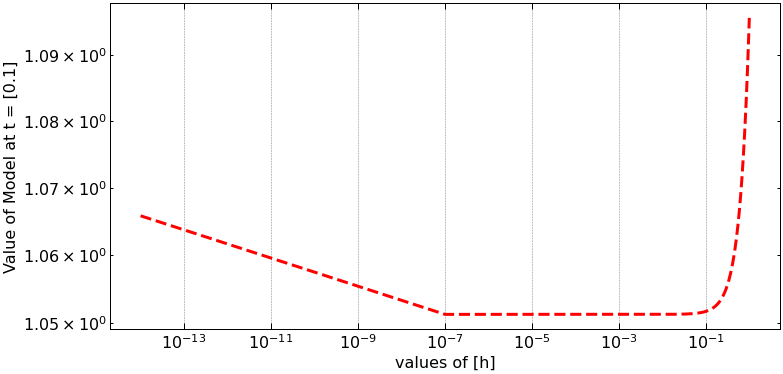

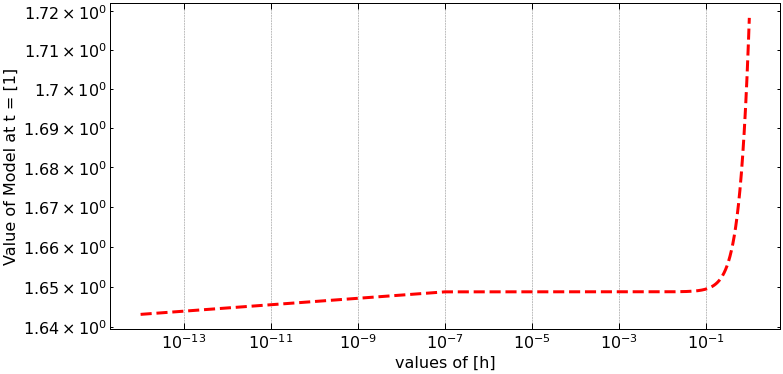

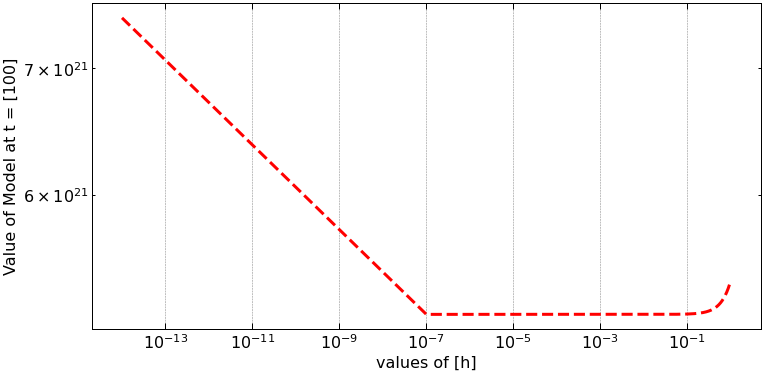

In [3]:
diiff_F('1', [0.1, 1, 100], y2)